In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

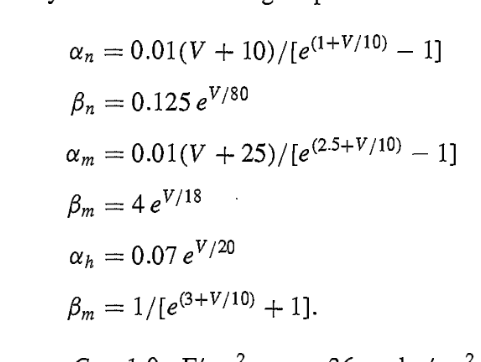

In [3]:
def alfn(V):
  "alpha_n"
  return 0.01*(V+10)/(np.exp(1+V/10)-1)

In [4]:
def betn(V):
  "betha_n"
  return 0.125*np.exp(V/80)

In [5]:
def alfm(V):
  "alpha_m"
  return 0.01*(V+25)/(np.exp(2.5+V/10)-1)

In [6]:
def betm(V):
  "betha_m"
  return 4*np.exp(V/18)

In [7]:
def alfh(V):
  "alpha_h"
  return 0.07*np.exp(V/20)

In [8]:
def beth(V):
  "betha_h"
  return 1/(np.exp(3+V/10)+1)

In [85]:
def Iext(t):
  "funcion arbritraria de corrientes externas que afecten el impulso nervioso"
  if t>0 and t<20:
    return -0.2
  elif t<40:
    return 0
  elif t<60:
    return 0.1
  else:
    return 0.6

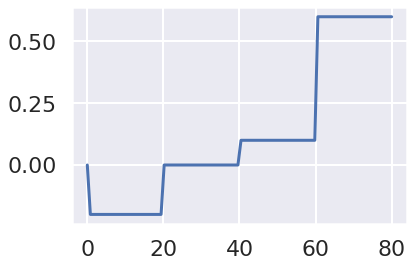

In [108]:
x=np.linspace(0,80,100)
y=[]
for i in x:
  y.append(Iext(i))
plt.plot(x,y)

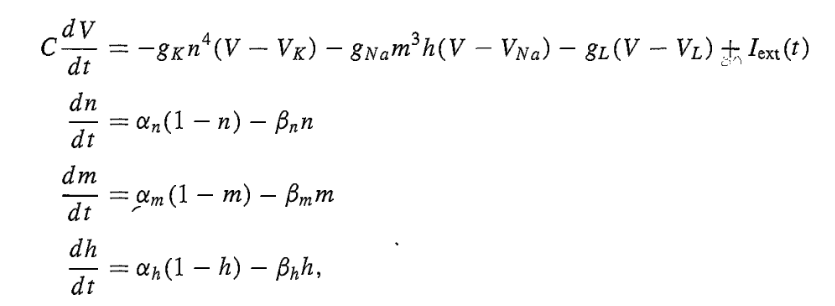

In [105]:
#y[0]=V,y[1]=n,y[2]=m,y[3]=h
def fderiv(t, y, C, gk, Vk, gNa, VNa, gL, VL): 
    return np.array([1/C*(-gk*np.power(y[1],4)*(y[0]-Vk)-gNa*np.power(y[2],3)*y[3]*(y[0]-VNa)-gL*(y[0]-VL)+Iext(t)),
                     alfn(y[0])*(1-y[1])-betn(y[0])*y[1],
                     alfm(y[0])*(1-y[2])-betm(y[0])*y[2],
                     alfh(y[0])*(1-y[3])-beth(y[0])*y[3]])

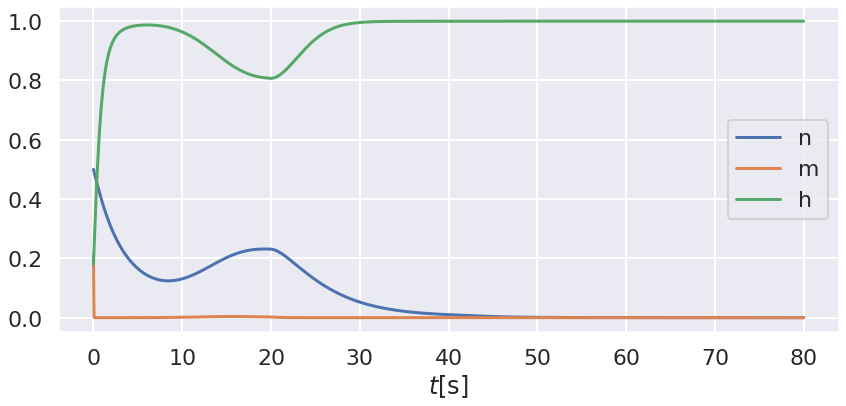

In [110]:
V0=53
n0=0.5
m0=0.21
h0=0.18
T0=0
TF=80
DT=0.0625

sol = solve_ivp(fderiv, t_span=[T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0=[V0, n0, m0, h0 ],
                args=(0.02, 0.36, 77, 1.2, -1.2, 0.003, 54.387))

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("poster")

fig, ax = plt.subplots(figsize=(14, 6))
#ax.plot(sol.t, sol.y[0], label=r"V")
ax.plot(sol.t, sol.y[1], label=r"n")
ax.plot(sol.t, sol.y[2], label=r"m")
ax.plot(sol.t, sol.y[3], label=r"h")
ax.set_xlabel(r"$t$[s]")
ax.legend()

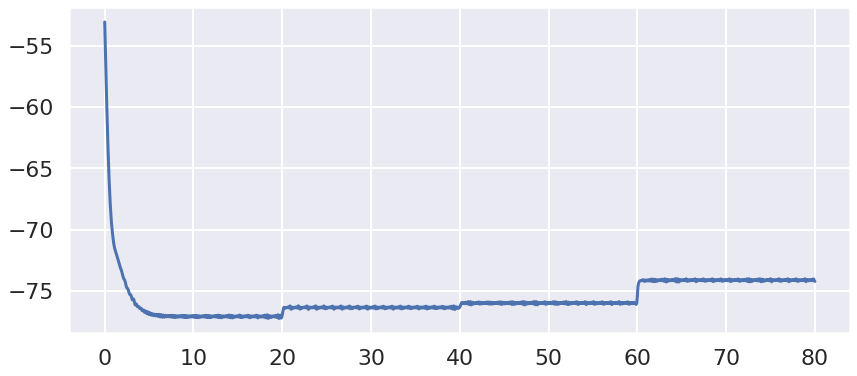

In [107]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(sol.t, sol.y[0], label=r"V")

# Pruebas

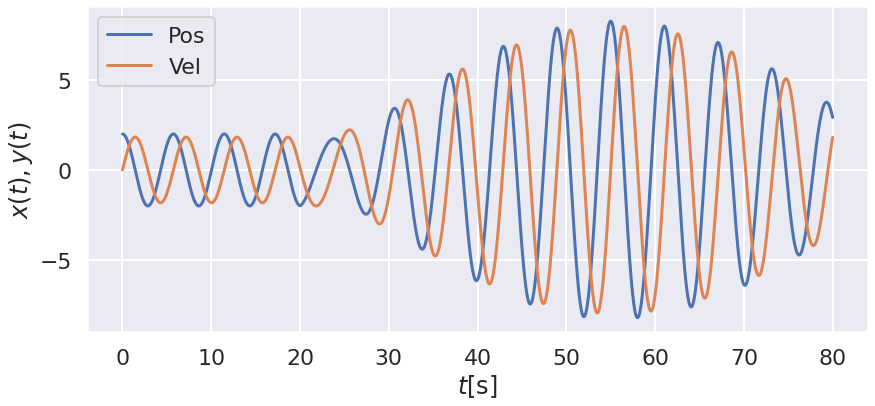

In [ ]:
from scipy.integrate import solve_ivp
import numpy as np

A=1.2
B=0.6
C=0.8
D=0.3

X0=2
Y0=0
T0=0
TF=80
DT=0.0625

def fext(t):
  if t<=20:
    return 0
  if 20<t<=80:
    return np.cos(t)

def fderiv(t, y): 
    return np.array([-A*y[1]+fext(t), y[0],])

sol = solve_ivp(fderiv, t_span=[T0, TF], t_eval=np.arange(T0, TF+DT, DT), y0=[X0, Y0])

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("poster")

fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(sol.t, sol.y[0], label=r"Pos")
ax.plot(sol.t, sol.y[1], label=r"Vel")
ax.set_xlabel(r"$t$[s]")
ax.set_ylabel(r"$x(t), y(t)$")
ax.legend()

# Can you compoute the critical points?